### Q5. [3 points] Build a model predicting the overall persuadability of voters in FX (wave 1 to wave 2)

In [20]:
# importing libraries


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [21]:
FX_indicators_2020_df = pd.read_csv('FX_indicators_2020.csv')

In [22]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384983,189580,1,55,23,5,0,1,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384984,137630,2,0,29,0,1,1,36,37,35,...,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N
384985,140246,2,0,68,1,0,0,33,32,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
FX_indicators_2020_df.describe()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,PRS16_PD,PRS16_PR,MSG_A,MSG_B
count,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,...,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000
mean,318457.590755,2.002221,0.570999,50.864408,1.205781,0.730287,0.618231,39.256326,37.093512,41.493762,...,0.982771,0.044602,0.145909,0.530914,0.534854,12.610530,46.943522,51.377199,0.077829,0.077764
std,183665.590377,0.816945,5.323766,18.141040,1.306398,1.063950,0.950737,6.934079,7.190315,7.296544,...,0.678549,0.330575,0.480255,0.521946,0.537452,1.089046,5.754449,5.814682,0.267902,0.267800
min,2.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.100000,17.000000,0.000000,0.000000
25%,159325.500000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,34.000000,32.000000,35.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,42.800000,47.800000,0.000000,0.000000
50%,318561.000000,2.000000,0.000000,51.000000,1.000000,0.000000,0.000000,38.000000,36.000000,41.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,45.800000,52.500000,0.000000,0.000000
75%,477540.000000,3.000000,0.000000,65.000000,2.000000,1.000000,1.000000,44.000000,40.000000,48.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,13.000000,50.400000,55.600000,0.000000,0.000000
max,636572.000000,3.000000,100.000000,113.000000,9.000000,9.000000,9.000000,65.000000,65.000000,65.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,16.000000,80.600000,64.300000,1.000000,1.000000


In [24]:
FX_indicators_2020_df.dtypes

VOTER_ID       int64
SET_NO         int64
OPP_SEX        int64
AGE            int64
HH_ND          int64
               ...  
MOVED_RDMB    object
MOVED_DRMB    object
MOVED_AWMB    object
MOVED_ADMB    object
MOVED_ARMB    object
Length: 152, dtype: object

In [25]:
FX_indicators_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384987 entries, 0 to 384986
Columns: 152 entries, VOTER_ID to MOVED_ARMB
dtypes: float64(2), int64(105), object(45)
memory usage: 446.5+ MB


In [26]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 152)
VOTER_ID           0
SET_NO             0
OPP_SEX            0
AGE                0
HH_ND              0
               ...  
MOVED_RDMB    371383
MOVED_DRMB    371383
MOVED_AWMB    371383
MOVED_ADMB    371383
MOVED_ARMB    371383
Length: 152, dtype: int64


In [27]:
FX_indicators_2020_df.isnull().any()

VOTER_ID      False
SET_NO        False
OPP_SEX       False
AGE           False
HH_ND         False
              ...  
MOVED_RDMB     True
MOVED_DRMB     True
MOVED_AWMB     True
MOVED_ADMB     True
MOVED_ARMB     True
Length: 152, dtype: bool

In [28]:
FX_indicators_2020_df.drop(columns = ['CAND1S','CAND2S','MESSAGE'], axis=1, inplace=True)

In [29]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'COMM_LT10':'ED_4COL'].columns, axis = 1)

In [30]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'H_AFDLN3P':'MSG_B'].columns, axis = 1)

In [31]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'VG_14_DV':'CAND2_SFT'].columns, axis = 1)

In [32]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'MOVED_AW':'MOVED_ARMB'].columns, axis = 1)

In [35]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(41166, 22)
VOTER_ID     0
SET_NO       0
OPP_SEX      0
AGE          0
HH_ND        0
HH_NR        0
HH_NI        0
MED_AGE      0
MED_AGE_M    0
MED_AGE_F    0
NH_WHITE     0
NH_AA        0
NH_NATAM     0
NH_ASIAN     0
NH_HPI       0
NH_OTHER     0
NH_MULT      0
HISP         0
GENDER_F     0
GENDER_M     0
MOVED_RD     0
MOVED_DR     0
dtype: int64


In [36]:
FX_indicators_2020_df.dropna(inplace=True)

In [37]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M,MOVED_RD,MOVED_DR
11,404213,1,29,78,0,0,2,39,26,50,...,0,2,0,0,1,6,0,1,N,N
20,136981,2,0,29,5,0,0,50,49,52,...,0,0,0,0,1,17,1,0,N,N
23,532172,1,0,26,2,0,2,37,35,38,...,0,0,0,0,3,6,1,0,N,N
25,208471,1,0,57,1,2,1,37,37,38,...,0,1,0,0,7,2,1,0,N,N
37,261184,3,0,50,0,0,2,38,38,39,...,0,1,0,0,1,3,0,1,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384973,206231,1,0,86,1,1,0,45,40,47,...,0,4,0,0,3,3,1,0,N,N
384977,206508,2,0,42,0,1,0,55,51,58,...,0,1,0,0,1,5,1,0,N,N
384978,515727,2,0,50,0,2,0,52,53,50,...,0,6,0,0,0,1,0,1,N,N
384984,137630,2,0,29,0,1,1,36,37,35,...,0,5,1,0,1,3,1,0,N,N


In [38]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(41166, 22)
VOTER_ID     0
SET_NO       0
OPP_SEX      0
AGE          0
HH_ND        0
HH_NR        0
HH_NI        0
MED_AGE      0
MED_AGE_M    0
MED_AGE_F    0
NH_WHITE     0
NH_AA        0
NH_NATAM     0
NH_ASIAN     0
NH_HPI       0
NH_OTHER     0
NH_MULT      0
HISP         0
GENDER_F     0
GENDER_M     0
MOVED_RD     0
MOVED_DR     0
dtype: int64


In [44]:
X = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'MOVED_RD':'MOVED_DR'].columns, axis = 1)

In [45]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,NH_WHITE,NH_AA,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M
11,404213,1,29,78,0,0,2,39,26,50,37,55,0,2,0,0,1,6,0,1
20,136981,2,0,29,5,0,0,50,49,52,82,0,0,0,0,0,1,17,1,0
23,532172,1,0,26,2,0,2,37,35,38,87,5,0,0,0,0,3,6,1,0
25,208471,1,0,57,1,2,1,37,37,38,54,37,0,1,0,0,7,2,1,0
37,261184,3,0,50,0,0,2,38,38,39,83,12,0,1,0,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384973,206231,1,0,86,1,1,0,45,40,47,87,4,0,4,0,0,3,3,1,0
384977,206508,2,0,42,0,1,0,55,51,58,72,21,0,1,0,0,1,5,1,0
384978,515727,2,0,50,0,2,0,52,53,50,92,1,0,6,0,0,0,1,0,1
384984,137630,2,0,29,0,1,1,36,37,35,68,22,0,5,1,0,1,3,1,0


In [47]:
X = pd.get_dummies(X)

In [48]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,NH_WHITE,NH_AA,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M
11,404213,1,29,78,0,0,2,39,26,50,37,55,0,2,0,0,1,6,0,1
20,136981,2,0,29,5,0,0,50,49,52,82,0,0,0,0,0,1,17,1,0
23,532172,1,0,26,2,0,2,37,35,38,87,5,0,0,0,0,3,6,1,0
25,208471,1,0,57,1,2,1,37,37,38,54,37,0,1,0,0,7,2,1,0
37,261184,3,0,50,0,0,2,38,38,39,83,12,0,1,0,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384973,206231,1,0,86,1,1,0,45,40,47,87,4,0,4,0,0,3,3,1,0
384977,206508,2,0,42,0,1,0,55,51,58,72,21,0,1,0,0,1,5,1,0
384978,515727,2,0,50,0,2,0,52,53,50,92,1,0,6,0,0,0,1,0,1
384984,137630,2,0,29,0,1,1,36,37,35,68,22,0,5,1,0,1,3,1,0


In [49]:
y = FX_indicators_2020_df[['MOVED_RD', 'MOVED_DR']]

In [50]:
y

,MOVED_RD,MOVED_DR
11,N,N
20,N,N
23,N,N
25,N,N
37,N,N
...,...,...
384973,N,N
384977,N,N
384978,N,N
384984,N,N


In [51]:
y = pd.get_dummies(y)

In [52]:
y

,MOVED_RD_N,MOVED_RD_Y,MOVED_DR_N,MOVED_DR_Y
11,1,0,1,0
20,1,0,1,0
23,1,0,1,0
25,1,0,1,0
37,1,0,1,0
...,...,...,...,...
384973,1,0,1,0
384977,1,0,1,0
384978,1,0,1,0
384984,1,0,1,0


In [54]:
y1 = y['MOVED_RD_Y']

y3 = y['MOVED_DR_Y']

### Build log regression model predicting persuadability of voters in FX for candidate support (y1 = CAND1_SDA_Y, wave 1 strong all way democrat) to (y3 = CAND2_SDA_Y, wave 2 strong all way democrat)

In [55]:
 from sklearn.model_selection import train_test_split
    
# Split dataset into training set and test set

X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.3, random_state=1) # 70% training and 30% test
X_train, X_test, y_train_3, y_test_3 = train_test_split(X, y3, test_size=0.3, random_state=1) # 70% training and 30% test

In [56]:
logreg = LogisticRegression()

In [57]:
logreg_1 = logreg.fit(X_train,y_train_1)
logreg_3 = logreg.fit(X_train,y_train_3)

In [58]:
#Predict the response for test dataset
y_pred_1 = logreg_1.predict(X_test)
y_pred_3 = logreg_3.predict(X_test)

In [59]:
y_pred_1
y_pred_3

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [60]:
y_pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [61]:
y_pred_3

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [62]:

print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))

Accuracy: 0.9497165991902834
Accuracy: 0.9931174089068826


In [63]:
# Predict for 1 observation
logreg_1.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
logreg_1.predict(X_test[0:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [64]:
# Predict for 1 observation
logreg_3.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
logreg_3.predict(X_test[0:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [65]:
# The score method returns the accuracy of the model
score = logreg_1.score(X_test, y_test_1)
print(score)

score = logreg_3.score(X_test, y_test_3)
print(score)

0.9497165991902834
0.9931174089068826


In [66]:
from sklearn.metrics import confusion_matrix #confusion_matrix 
confusion_matrix(y_test_1, y_pred_1)

array([[11729,     0],
       [  621,     0]], dtype=int64)

In [67]:
confusion_matrix(y_test_3, y_pred_3)

array([[12265,     0],
       [   85,     0]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report # classification_report 

print(classification_report(y_test_1, y_pred_1))

print(classification_report(y_test_3, y_pred_3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11729
           1       0.00      0.00      0.00       621

    accuracy                           0.95     12350
   macro avg       0.47      0.50      0.49     12350
weighted avg       0.90      0.95      0.93     12350

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12265
           1       0.00      0.00      0.00        85

    accuracy                           0.99     12350
   macro avg       0.50      0.50      0.50     12350
weighted avg       0.99      0.99      0.99     12350



C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


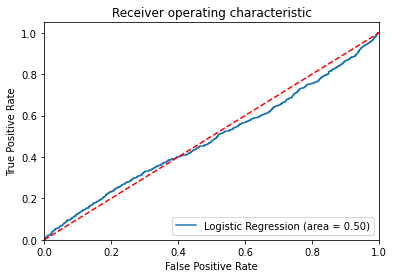

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test_1, logreg_1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_1, logreg_1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

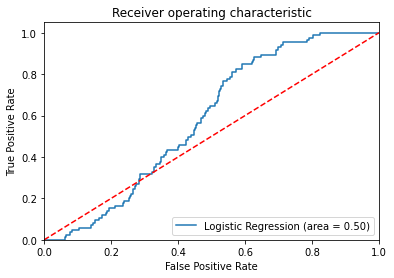

In [70]:
ogit_roc_auc = roc_auc_score(y_test_3, logreg_3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test_3, logreg_3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

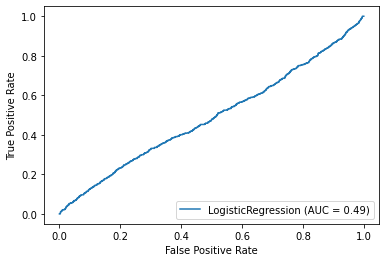

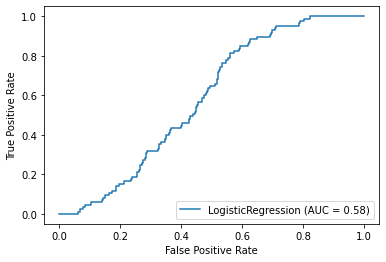

In [71]:
from sklearn.metrics import plot_roc_curve # roc_curve
plot_roc_curve(logreg_1, X_test, y_test_1)
plot_roc_curve(logreg_3, X_test, y_test_3)

In [72]:
prob_1 = logreg_1.predict_proba(X_test[0:100])

In [83]:
prob_1

array([[0.98666451, 0.01333549],
       [0.99409889, 0.00590111],
       [0.99203984, 0.00796016],
       [0.9954638 , 0.0045362 ],
       [0.9788742 , 0.0211258 ],
       [0.98759027, 0.01240973],
       [0.99608438, 0.00391562],
       [0.99515585, 0.00484415],
       [0.98572894, 0.01427106],
       [0.99746832, 0.00253168],
       [0.99311328, 0.00688672],
       [0.99772054, 0.00227946],
       [0.99032933, 0.00967067],
       [0.9928046 , 0.0071954 ],
       [0.9936187 , 0.0063813 ],
       [0.98310916, 0.01689084],
       [0.99458542, 0.00541458],
       [0.9988178 , 0.0011822 ],
       [0.99465981, 0.00534019],
       [0.99654708, 0.00345292],
       [0.98722463, 0.01277537],
       [0.99537328, 0.00462672],
       [0.98010764, 0.01989236],
       [0.99247615, 0.00752385],
       [0.99440362, 0.00559638],
       [0.9939096 , 0.0060904 ],
       [0.99279553, 0.00720447],
       [0.9914078 , 0.0085922 ],
       [0.99547771, 0.00452229],
       [0.99617378, 0.00382622],
       [0.

In [95]:
VOTER_ID_100= X_test.iloc[0:100, 0].reset_index(drop=True)

In [97]:
VOTER_ID_100

0     224345
1     388004
2     130261
3     268971
4     204685
       ...  
95     46239
96    268326
97    374261
98     15013
99    601397
Name: VOTER_ID, Length: 100, dtype: int64

In [98]:
# first 100 voters prediction for candidate support (y1 = CAND1_SDA_Y, wave 1 strong all way democrat)

y_100_1 = logreg_1.predict(X_test[0:100])

# first 100 voters prediction for candidate support (y3 = CAND2_SDA_Y, wave 2 strong all way democrat)

y_100_3 = logreg_3.predict(X_test[0:100])

In [99]:
y_100_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [100]:
y_100_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [101]:
y_100_S_1= pd.Series(y_100_1).reset_index(drop=True)

In [102]:
y_100_S_1

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: uint8

In [103]:
y_100_S_3= pd.Series(y_100_3).reset_index(drop=True)

In [104]:
y_100_S_3

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: uint8

In [107]:
q5_df_voter_ID_modelscore_log_reg = pd.concat([VOTER_ID_100, y_100_S_1, y_100_S_3 ], axis=1, 
                                              keys=["VOTER_ID_100", "Moved from Republican to Democrat to between wave 1 and wave 2 IDs", 
                                                    " Moved from Democrat to Republican between wave 1 and wave 2 IDs"])

In [108]:
q5_df_voter_ID_modelscore_log_reg

,VOTER_ID_100,Moved from Republican to Democrat to between wave 1 and wave 2 IDs,Moved from Democrat to Republican between wave 1 and wave 2 IDs
0,224345,0,0
1,388004,0,0
2,130261,0,0
3,268971,0,0
4,204685,0,0
...,...,...,...
95,46239,0,0
96,268326,0,0
97,374261,0,0
98,15013,0,0


In [109]:
q5_df_voter_ID_modelscore_log_reg.to_csv (r'C:\Users\Nirav\Desktop\pyjup\q5_df_voter_ID_modelscore_log_reg.csv', 
                                            index = False, header=True)